Implement a MTZ-like model for the capacitated vehicle routing problem (CVRP).
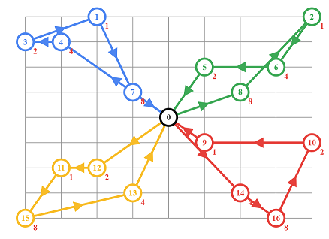

In [62]:
import networkx as nx
import math


k = 4       # number of vehicles
n = 20      # number of demand points

depot = 0                       
dem_points = list(range(1,n+1)) # nodes 1, 2, ..., 20

G = nx.complete_graph(n+1,nx.DiGraph()) 


In [50]:
# def generate_circle_points(num_points, radius):
#     G = nx.Graph()
#     delta_theta = 2 * math.pi / num_points

#     for i in range(num_points):
#         theta = i * delta_theta
#         x = radius * math.cos(theta)
#         y = radius * math.sin(theta)
#         G.add_node(i, pos=(x, y))

#     for i in range(num_points):
#         for j in range(i + 1, num_points):
#             G.add_edge(i, j)

#     return G

# # # Example usage
# num_points = 20  # Number of points in the circle
# radius = 5.0    # Radius of the circle
# circle_graph = generate_circle_points(num_points, radius)
# print(circle_graph)
# # You can access the positions of nodes as follows
# node_positions = nx.get_node_attributes(circle_graph, 'pos')
# print(node_positions)



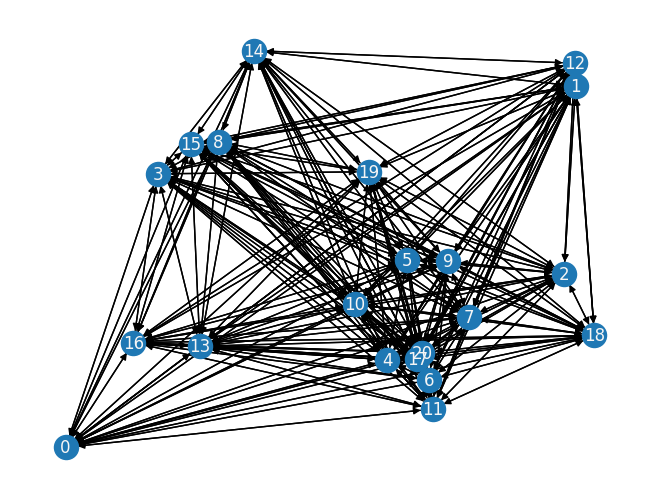

In [63]:
# for convenience, pick the city (x,y)-coordinates at random
import random
my_pos = { i : ( random.random(), random.random() ) for i in dem_points } # pos[i] = (x_i, y_i)

# let's locate the depot in the middle
my_pos[depot] = (-0.1, -0.1)





nx.draw(G, pos=my_pos,with_labels=True, font_color='whitesmoke')



In [59]:
# for convenience, suppose that distances are Euclidean
import math
def eucl_dist(x1,y1,x2,y2):
    return math.sqrt( (x1-x2)**2 + (y1-y2)**2 )

for i,j in G.edges:
    (x1,y1) = my_pos[i]
    (x2,y2) = my_pos[j]
    G.edges[i,j]['length'] = eucl_dist(x1,y1,x2,y2)

In [61]:
# suppose each vehicle has capacity 100
Q = 100

# suppose each demand point has demand 20
q = { i : 20 for i in dem_points }

1241.22s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


^C
ERROR: Operation cancelled by user


In [60]:

import gurobipy as gp
from gurobipy import GRB

ModuleNotFoundError: No module named 'gurobipy'

In [ ]:


m = gp.Model()
x = m.addVars(G.edges,vtype=GRB.BINARY)

m.setObjective( gp.quicksum( G.edges[i,j]['length'] * x[i,j] for i,j in G.edges ), GRB.MINIMIZE )

# Enter each demand point once
m.addConstrs( gp.quicksum( x[i,j] for i in G.predecessors(j) ) == 1 for j in dem_points )

# Leave each demand point once
m.addConstrs( gp.quicksum( x[i,j] for j in G.successors(i) ) == 1 for i in dem_points )

# Leave the depot k times
m.addConstr( gp.quicksum( x[depot,j] for j in G.successors(depot) ) == k )




In [ ]:
# First, solve a relaxation

# get the solution and draw it
m.optimize()

tour_edges = [ e for e in G.edges if x[e].x > 0.5 ]
nx.draw(G.edge_subgraph(tour_edges), pos=my_pos)


In [ ]:

# Add the MTZ variables and constraints, and solve
u = m.addVars( G.nodes )

u[depot].LB = 0
u[depot].UB = 0

for i in dem_points:
    u[i].LB = q[i]
    u[i].UB = Q

# c = m.addConstrs( u[i] - u[j] + Q * x[i,j] <= Q - q[j] for i,j in G.edges if j != depot )


# Try again, using stronger ("lifted") version of these constraints

# m.remove(c)  # remove the previous MTZ constraints
q[depot] = 0
m.addConstrs( u[i] - u[j] + Q * x[i,j] + ( Q - q[i] - q[j] ) * x[j,i] <= Q - q[j] for i,j in G.edges if j != depot )




In [ ]:
# re-optimize
m.reset()    # start solve process from scratch
m.optimize()


In [1]:
# get the solution and draw it

# get the solution and draw it
tour_edges = [ e for e in G.edges if x[e].x > 0.5 ]
nx.draw(G.edge_subgraph(tour_edges), pos=my_pos)

NameError: name 'G' is not defined